True Predictions Plots

In [39]:
import pandas as pd
import numpy as np
import abutils
import abstar

In [40]:
moepos = pd.read_csv("./TXG_mAbs_BALMMoE_truepredictions_pos.csv")
moechem = pd.read_csv("./TXG_mAbs_BALMMoE_truepredictions_chem.csv")
moeaa = pd.read_csv("./TXG_mAbs_BALMMoE_truepredictions.csv")

In [45]:
balmpos = pd.read_csv("./TXG_mAbs_BALM_truepredictions_pos.csv")
balmchem = pd.read_csv("./TXG_mAbs_BALM_truepredictions_chem.csv")
balmaa = pd.read_csv("./TXG_mAbs_BALM_truepredictions.csv")
balmpos

,Unnamed: 0,mAbs_pos,wt,wt_prob,max_prob_aa,max_prob,max/wt_ratio,pos,alias
0,0,TXG-0001_pos30,S,-7.372695,<mask>,-7.241244,1.140482e+00,30,TXG-0001
1,1,TXG-0001_pos79,L,-7.271486,<mask>,-6.599526,1.958072e+00,79,TXG-0001
2,2,TXG-0001_pos102,S,-10.241490,<mask>,-6.760008,3.250786e+01,102,TXG-0001
3,3,TXG-0001_pos104,W,-15.808975,<pad>,-4.619199,7.238657e+04,104,TXG-0001
4,4,TXG-0001_pos156,S,-16.900642,A,-3.184476,9.054310e+05,156,TXG-0001
...,...,...,...,...,...,...,...,...,...
1243,1243,TXG-0239_pos102,D,-23.543170,<mask>,-6.626678,2.221974e+07,102,TXG-0239
1244,1244,TXG-0239_pos104,Y,-20.524220,<mask>,-6.489012,1.245700e+06,104,TXG-0239
1245,1245,TXG-0239_pos105,Y,-21.248663,<s>,-6.530428,2.466313e+06,105,TXG-0239
1246,1246,TXG-0239_pos113,T,-23.594795,<mask>,-6.910680,1.761242e+07,113,TXG-0239


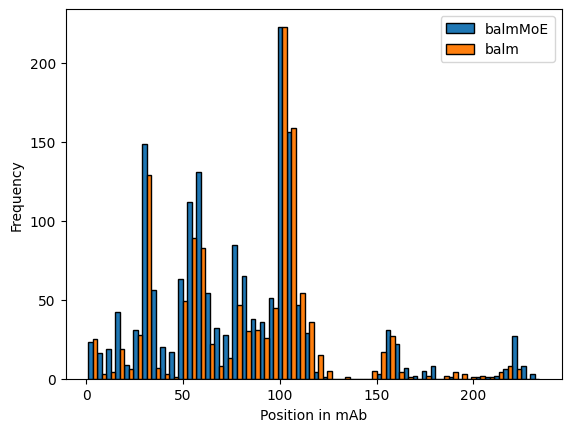

In [52]:
import numpy as np

# Assuming truepos_df and truepos_balm are your DataFrames
# and 'pos' is the column with the data you want to plot.

# Calculate the histogram data
counts1, bin_edges = np.histogram(moepos['pos'], bins=50)
counts2, _ = np.histogram(balmpos['pos'], bins=bin_edges)

# Calculate the width of each bar
bin_width = np.diff(bin_edges)[0]
bar_width = bin_width / 2

# Adjust the bin_edges for the side-by-side bars
centers = bin_edges[:-1] + bin_width / 2
left_positions = centers - bar_width / 2
right_positions = centers + bar_width / 2

# Plot the bars
plt.bar(left_positions, counts1, width=bar_width, edgecolor='black', label='balmMoE')
plt.bar(right_positions, counts2, width=bar_width, edgecolor='black', label='balm')

# Add labels and legend
plt.xlabel('Position in mAb')
plt.ylabel('Frequency')
plt.legend()
plt.savefig("./hist_predictedmuts_truepos_balmMoE_balm.pdf")
# Show the plot
plt.show()

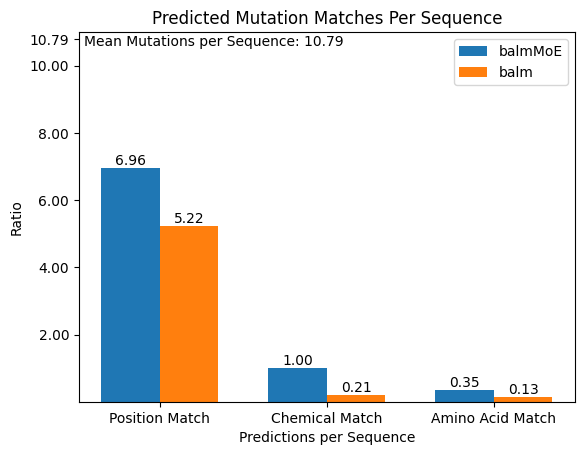

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['balmMoE', 'balm']
measurement_1 = [len(moepos)/239, len(balmpos)/239]
measurement_2 = [len(moechem)/239, len(balmchem)/239]
measurement_3 = [len(moeaa)/239, len(balmaa)/239]

# Define the measurements as new categories
measurements = ['Position Match', 'Chemical Match', 'Amino Acid Match']

# Transpose the data
data = np.array([measurement_1, measurement_2, measurement_3])

# Define the position of the bars
bar_width = 0.35  # Width of the bars
index = np.arange(len(measurements))

# Plotting
fig, ax = plt.subplots()
for i in range(len(categories)):
    bars = ax.bar(index + i * bar_width, data[:, i], bar_width, label=categories[i])
    
    # Add labels on top of each bar
    for bar in bars:
        yval = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # X position (center of the bar)
            yval,  # Y position (top of the bar)
            f'{yval:.2f}',  # Label text (formatted to 2 decimal places)
            ha='center', va='bottom',  # Center horizontally, align bottom vertically
            fontsize=10, color='black'  # Style the label
        )

# Add labels, title, and legend
ax.set_xlabel('Predictions per Sequence')
ax.set_ylabel('Ratio')
ax.set_title("Predicted Mutation Matches Per Sequence")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(measurements)
ax.legend()

ymax = 11
ax.set_ylim(0, ymax)  # Set the exact y-axis limit
ax.margins(y=0)  # Remove any margins that might be automatically added

# Add a tick mark at the maximum y-axis value
yticks = ax.get_yticks().tolist()  # Get current y-ticks
yticks = [2, 4, 6, 8, 10]  # Ensure no tick is above ymax
yticks.append(10.79)  # Add the maximum y value to the tick list
ax.set_yticks(yticks)  # Set the new list of y-ticks
ax.set_yticklabels([f'{tick:.2f}' for tick in yticks])  # Label the ticks with 2 decimal places

# Add a special label inside the graph at the maximum y-value
ax.text(
    0.5, 10.5,  # Position the text at the rightmost bar and max y
    f'Mean Mutations per Sequence: {10.79}',  # Custom label text
    ha='center', va='bottom',  # Center horizontally, align bottom vertically
    fontsize=10, color='black'  # Style the label
)
plt.savefig("./truepos_truechem_truemuts_perseq_balm_balmmoe.pdf")
# Display the plot
plt.show()
